In [32]:
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns

In [54]:
# specify decoder directory
ids = {
    'lab': 'musall',
    'expt': 'vistrained',
    'animal': 'mSM30',
    'session': '10-Oct-2017'}
results_dir = '/home/mattw/results/behavenet'
tt_expt = 'decoder_grid_search'
tt_dir = os.path.join(
    results_dir, ids['lab'], ids['expt'], ids['animal'], ids['session'], 'test_tube_data',
    tt_expt)

In [157]:
import csv

# gather all versions
def get_dirs(path):
    return next(os.walk(path))[1]

versions = get_dirs(tt_dir)

# load csv files with model metrics (saved out from test tube)
metrics = []
for i, version in enumerate(versions):
    # read metrics csv file
    model_dir = os.path.join(tt_dir, version)
    try:
        metric = pd.read_csv(os.path.join(model_dir, 'metrics.csv'))
    except:
        continue
    # load model info
#     try:
#         with open(os.path.join(model_dir, 'meta_tags.pkl'), 'rb') as f:
#             hparams = pickle.load(f)
    with open(os.path.join(model_dir, 'meta_tags.csv'), mode='r') as f:
        hp = csv.reader(f)
        hparams = {rows[0]:rows[1] for rows in hp}
#     except:
#         continue
    # append model info to metrics
    metric['version'] = version
    for key, val in hparams.items():
        metric[key] = val
    metrics.append(metric)
# put everything in pandas dataframe
metrics_df = pd.concat(metrics, sort=False)

### Plot distribution of test loss across all models

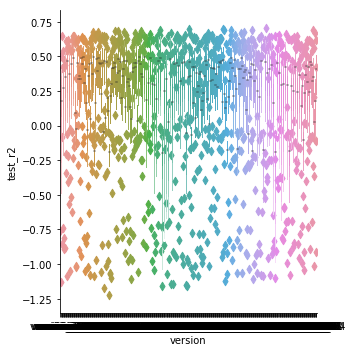

In [64]:
# for each version, only keep rows where test_loss is not nan
data_queried = metrics_df[pd.notna(metrics_df.test_loss)]

y_axis = 'test_r2' # 'test_loss' | 'test_r2'
plot_type = 'boxen'
hue = None
x_axis = 'version' # 'layers' | 'layer_size' | 'pred' | 'lags'

splt = sns.catplot(
    x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried)

## Plot distribution of test loss across all models

### function of lags/layers (take best models over learning rate/l2 reg/units)

In [175]:
print(data_queried)

    batch  best_val_epoch                  created_at  dataset  epoch  \
40    194            40.0  2019-05-02 14:52:56.190941        0     40   
40     22             NaN  2019-05-02 01:31:35.541732        0     17   
40    194            40.0  2019-05-02 04:11:47.661872        0     40   
40    194            39.0  2019-05-02 06:35:47.732328        0     40   
40     17             NaN  2019-05-02 02:08:21.280439        0     22   
40     10             NaN  2019-05-02 04:37:43.948483        0     29   
40    194            40.0  2019-05-02 16:49:52.397938        0     40   
40    194            40.0  2019-05-02 08:52:50.420227        0     40   
40    194            39.0  2019-05-02 03:47:02.923325        0     40   
40      5             NaN  2019-05-02 02:35:17.913796        0     34   
40      5             NaN  2019-05-02 10:13:12.133144        0     34   
40    194            40.0  2019-05-02 01:10:25.566033        0     40   
40     18             NaN  2019-05-02 01:07:23.4813

In [174]:
# take median over test_loss
# take max median
data_queried = metrics_df.loc[metrics_df.groupby(
     ['n_lags', 'n_hid_layers'])['val_loss'].idxmin()]

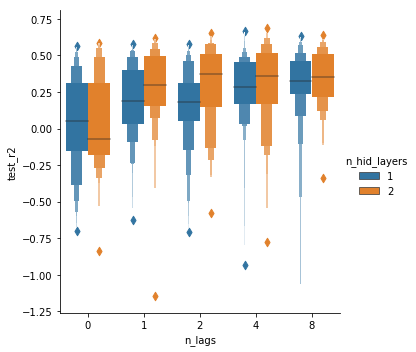

In [176]:
y_axis = 'test_r2' # 'test_loss' | 'test_r2'
plot_type = 'boxen'

hue = 'n_hid_layers'
x_axis = 'n_lags'

splt = sns.catplot(
    x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried)

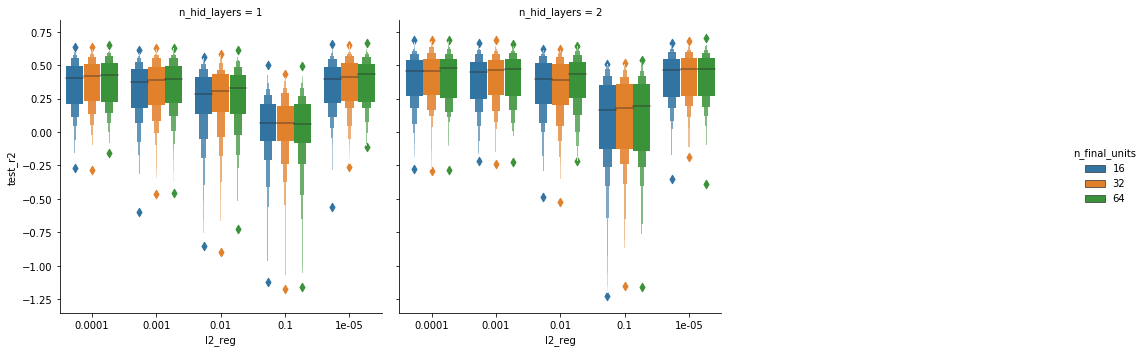

In [122]:
# for each version, only keep rows where test_loss is not nan
data_queried = metrics_df[pd.notna(metrics_df.test_loss)]

best_lr = data_queried.groupby(['learning_rate']).mean().reset_index()
best_lr = best_lr[best_lr['test_loss']==best_lr['test_loss'].min()]['learning_rate'].values[0]
data_queried = data_queried[data_queried.learning_rate==best_lr]

# best_lr = data_queried.groupby('learning_rate').mean()

# n_lags | n_hid_layers | n_final_units | l2_reg | learning_rate
y_axis = 'test_r2' # 'test_loss' | 'test_r2'
plot_type = 'boxen'

hue = 'n_final_units'
col = 'n_hid_layers'
x_axis = 'l2_reg'
# hue = 'learning_rate'
# x_axis = 'n_hid_layers'
# col = None

if col is None:
    splt = sns.catplot(
        x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried)
else:
    splt = sns.catplot(
        x=x_axis, y=y_axis, hue=hue, kind=plot_type, 
        col=col, col_wrap=3, data=data_queried)